# Finding the closest EURO-CORDEX grid cell to a Met Éireann met station

- Station details can be found here: <https://cli.fusio.net/cli/climate_data/webdata/StationDetails.csv>
  - Cork Airport: (-8.48611, 51.84722)
  - Fermoy (Moore Park): (-8.26389, 52.16389)
- The Cork Airport station has historical data from 1961
- The Moore Park station was installed in 2003, replacing a manual station which operated from 1961 (see <https://www.met.ie/climate/weather-observing-stations>)
- Check the "Show closed stations" box to obtain data for this replaced station: <https://www.met.ie/climate/available-data/historical-data>

In [1]:
# import required libraries
library(eurocordexr)
library(sf)

Loading required package: data.table

Loading required package: magrittr

Loading required package: ncdf4

Loading required package: ncdf4.helpers

Linking to GEOS 3.10.2, GDAL 3.5.0, PROJ 9.0.0; sf_use_s2() is TRUE



In [2]:
# set working directory to root
setwd("../../")

In [5]:
# read one of the EURO-CORDEX data files
ncfile <- paste(
    "./data/eurocordex/DMI/historical/mon/",
    "pr_EUR-11_NCC-NorESM1-M_historical_r1i1p1_",
    "DMI-HIRHAM5_v3_mon_197101-198012.nc",
    sep = ""
)

In [6]:
# extract the latitude and longitude from the nc file
df_coord <- nc_grid_to_dt(filename = ncfile, variable = "lat")
df_coord$lon <- nc_grid_to_dt(filename = ncfile, variable = "lon")$lon

In [7]:
head(df_coord)

icell,date,lat,lon
<int>,<lgl>,<dbl>,<dbl>
174265,NA,21.98783,-10.063880
174266,NA,22.02784,-9.963886
174267,NA,22.06772,-9.863804
174268,NA,22.10746,-9.763632
174269,NA,22.14708,-9.663371
174270,NA,22.18656,-9.563022


In [8]:
# sort by grid cell in ascending order
df_coord <- df_coord[order(df_coord$icell),]

In [9]:
# remove redundant date column
df_coord$date <- NULL

In [10]:
head(df_coord)

icell,lat,lon
<int>,<dbl>,<dbl>
1,60.20376,-44.59386
2,60.27934,-44.45553
3,60.35482,-44.31666
4,60.43020,-44.17726
5,60.50549,-44.03732
6,60.58068,-43.89684


## Cork Airport

In [11]:
# create a row corresponding to Cork Airport's coordinates at icell = -1
df_coord <- rbind(data.frame(
    icell = -1, lon = -8.48611, lat = 51.84722
), df_coord)

In [12]:
head(df_coord, 10)

,icell,lon,lat
,<dbl>,<dbl>,<dbl>
1,-1,-8.48611,51.84722
2,1,-44.59386,60.20376
3,2,-44.45553,60.27934
4,3,-44.31666,60.35482
5,4,-44.17726,60.43020
6,5,-44.03732,60.50549
7,6,-43.89684,60.58068
8,7,-43.75581,60.65577
9,8,-43.61423,60.73076


In [13]:
# convert to a spatial data frame
df_coord_sf <- st_as_sf(df_coord, coords = c("lon", "lat"), crs = 4326)

In [14]:
# create a standalone data frame for the Cork Airport data
met_station <- subset(df_coord_sf, icell == -1)

In [15]:
# calculate the distance between Cork Airport and all other cells
df_coord_sf$dist <- st_distance(df_coord_sf, met_station)

In [16]:
# convert to data frame to view the results
df_coord_sf <- as.data.frame(df_coord_sf)

In [17]:
# sort by distance in ascending order
df_coord_sf <- df_coord_sf[order(df_coord_sf$dist),]

In [18]:
# reset row names
rownames(df_coord_sf) <- NULL

In [19]:
# view the results
head(df_coord_sf, 10)

,icell,geometry,dist
,<dbl>,<POINT [°]>,<[m]>
1,-1,POINT (-8.48611 51.84722),0.000
2,68801,POINT (-8.542148 51.87473),4916.063
3,69225,POINT (-8.480483 51.77155),8423.108
4,68802,POINT (-8.375313 51.91269),10527.935
5,69226,POINT (-8.313956 51.80942),12554.952
6,68800,POINT (-8.708709 51.83656),15338.422
7,68377,POINT (-8.604096 51.97789),16631.304
8,69224,POINT (-8.646737 51.73346),16795.101
9,68378,POINT (-8.436953 52.01592),19059.267


In [20]:
# save closest grid cell value
icell_ca <- df_coord_sf[2, "icell"]

## Moore Park

In [21]:
# create a row corresponding to Moore Park's coordinates at icell = 0
df_coord <- rbind(data.frame(
    icell = -2, lon = -8.26389, lat = 52.16389
), df_coord)

In [22]:
head(df_coord, 10)

,icell,lon,lat
,<dbl>,<dbl>,<dbl>
1,-2,-8.26389,52.16389
2,-1,-8.48611,51.84722
3,1,-44.59386,60.20376
4,2,-44.45553,60.27934
5,3,-44.31666,60.35482
6,4,-44.17726,60.43020
7,5,-44.03732,60.50549
8,6,-43.89684,60.58068
9,7,-43.75581,60.65577


In [23]:
# convert to a spatial data frame
df_coord_sf <- st_as_sf(df_coord, coords = c("lon", "lat"), crs = 4326)

In [24]:
# create a standalone data frame for the Moore Park data
met_station <- subset(df_coord_sf, icell == -2)

In [25]:
# calculate the distance between Moore Park and all other cells
df_coord_sf$dist <- st_distance(df_coord_sf, met_station)

In [26]:
# convert to data frame to view the results
df_coord_sf <- as.data.frame(df_coord_sf)

In [27]:
# sort by distance in ascending order
df_coord_sf <- df_coord_sf[order(df_coord_sf$dist),]

In [28]:
# reset row names
rownames(df_coord_sf) <- NULL

In [29]:
# view the results
head(df_coord_sf, 10)

,icell,geometry,dist
,<dbl>,<POINT [°]>,<[m]>
1,-2,POINT (-8.26389 52.16389),0.000
2,67955,POINT (-8.331147 52.15702),4650.961
3,67956,POINT (-8.16314 52.19469),7676.134
4,68379,POINT (-8.269534 52.05374),12254.466
5,68380,POINT (-8.101841 52.09133),13691.945
6,67531,POINT (-8.393046 52.26028),13867.521
7,67532,POINT (-8.224726 52.29803),15152.412
8,67954,POINT (-8.498878 52.11913),16790.759
9,67957,POINT (-7.994858 52.23214),19844.377


In [30]:
# save closest grid cell value
icell_mp <- df_coord_sf[2, "icell"]

## Plots

In [31]:
# set plot resolution
options(repr.plot.res = 200)

In [32]:
# separate met station coordinates from the cells
met_station <- subset(df_coord, icell < 0)
df_coord <- subset(df_coord, icell > 0)

In [33]:
# filter closest grid cells
icell <- subset(df_coord, icell == icell_ca | icell == icell_mp)

In [34]:
met_station

,icell,lon,lat
,<dbl>,<dbl>,<dbl>
1,-2,-8.26389,52.16389
2,-1,-8.48611,51.84722


In [35]:
head(df_coord)

,icell,lon,lat
,<dbl>,<dbl>,<dbl>
3,1,-44.59386,60.20376
4,2,-44.45553,60.27934
5,3,-44.31666,60.35482
6,4,-44.17726,60.43020
7,5,-44.03732,60.50549
8,6,-43.89684,60.58068


In [36]:
icell

,icell,lon,lat
,<dbl>,<dbl>,<dbl>
67957,67955,-8.331147,52.15702
68803,68801,-8.542148,51.87473


In [37]:
# convert to spatial data frames
df_coord_sf <- st_as_sf(df_coord, coords = c("lon", "lat"), crs = 4326)
met_station <- st_as_sf(met_station, coords = c("lon", "lat"), crs = 4326)
icell <- st_as_sf(icell, coords = c("lon", "lat"), crs = 4326)

In [3]:
# Ireland boundary data
ie <- st_read("./data/boundary/boundaries.gpkg", "NUTS_Ireland")

Reading layer `NUTS_Ireland' from data source 
  `/run/media/nms/Backup/Documents/Git/ClimAg/ClimAg/data/boundary/boundaries.gpkg' 
  using driver `GPKG'
Simple feature collection with 1 feature and 2 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -10.66164 ymin: 51.42259 xmax: -5.433173 ymax: 55.43512
Geodetic CRS:  WGS 84


In [39]:
print(ie)

Simple feature collection with 1 feature and 1 field
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -10.66164 ymin: 51.42259 xmax: -5.433173 ymax: 55.43512
Geodetic CRS:  WGS 84
     NAME                           geom
1 Ireland MULTIPOLYGON (((-10.19022 5...


In [40]:
# keep only grid cells that intersect with Ireland's boundary
df_coord_ie <- st_intersection(df_coord_sf, ie)

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


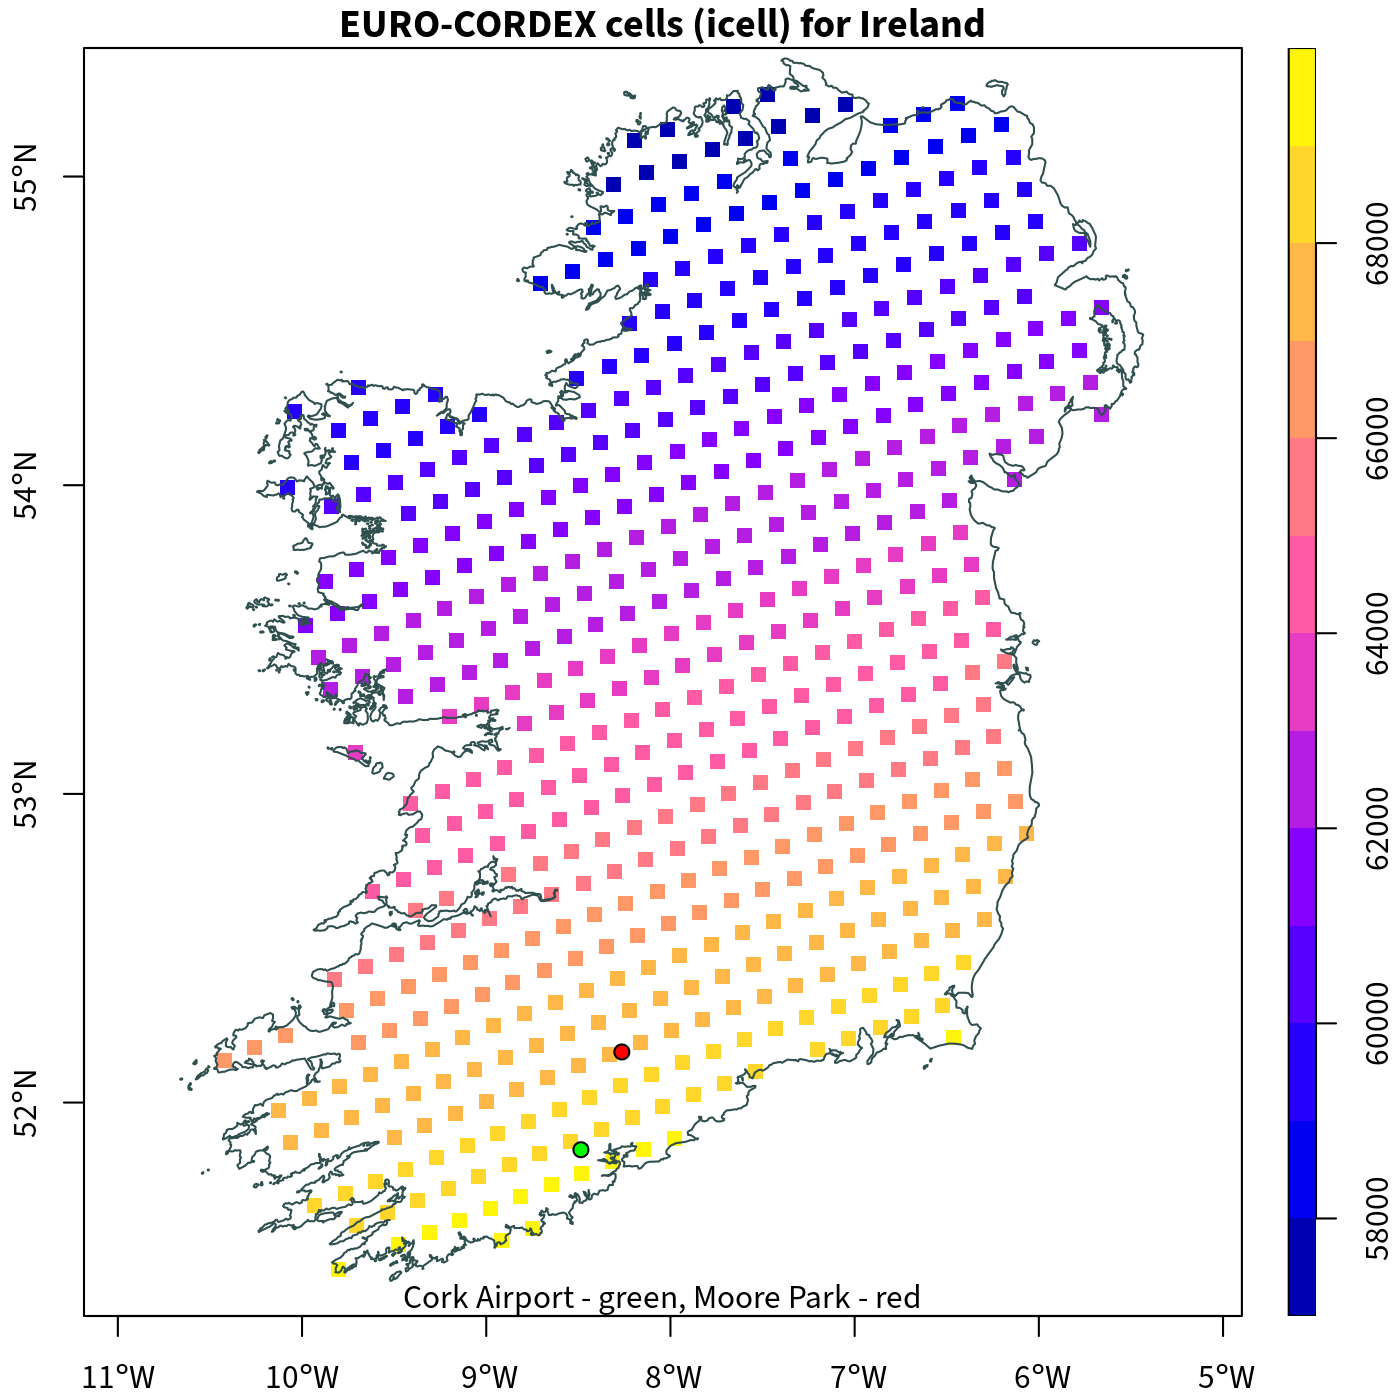

In [41]:
par(family = "Source Sans 3")

plot(
    df_coord_ie["icell"],
    pch = 15,
    main = "EURO-CORDEX cells (icell) for Ireland",
    key.length = 1,
    key.width = lcm(1.5),
    axes = TRUE,
    reset = FALSE
)
plot(met_station["geometry"], pch = 21, bg = c("red", "green"), add = TRUE)
plot(ie["geom"], add = TRUE, border = "darkslategrey")
mtext(
    "Cork Airport - green, Moore Park - red", side = 1, line = -1
)

In [42]:
# project to Irish transverse mercator
# https://www.gov.uk/government/publications/uk-geospatial-data-standards-register/national-geospatial-data-standards-register#standards-for-coordinate-reference-systems
crs_ie <- 2157

df_coord_ie_ = st_transform(df_coord_ie, crs = crs_ie)
ie_ = st_transform(ie, crs = crs_ie)
met_station_ = st_transform(met_station, crs = crs_ie)
icell_ = st_transform(icell, crs = crs_ie)

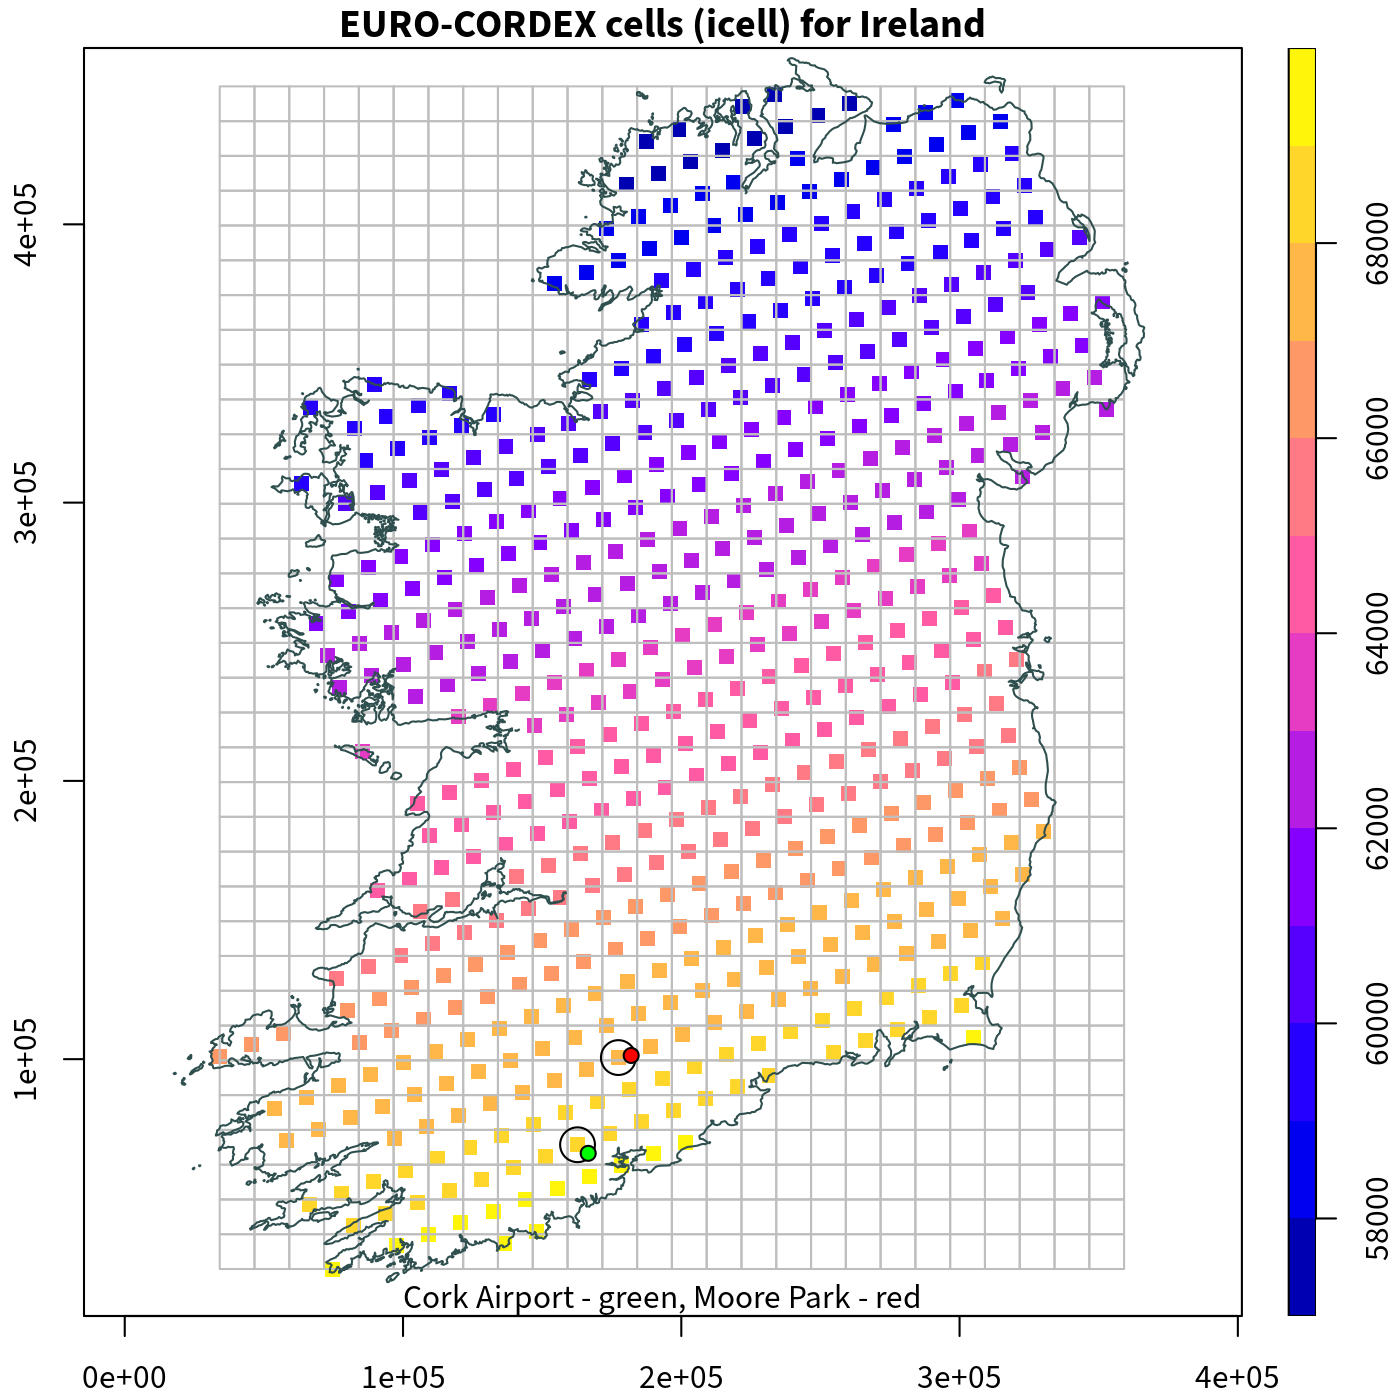

In [48]:
par(family = "Source Sans 3")

plot(
    df_coord_ie_["icell"],
    pch = 15,
    main = "EURO-CORDEX cells (icell) for Ireland",
    key.length = 1,
    key.width = lcm(1.5),
    axes = TRUE,
    reset = FALSE
)
plot(
    st_make_grid(df_coord_ie_, cellsize = 12500),
    border = "grey",
    add = TRUE
)
plot(st_boundary(st_buffer(icell_, dist = 12500/2)), col = "black", add = TRUE)
plot(met_station_["geometry"], pch = 21, bg = c("red", "green"), add = TRUE)
plot(ie_["geom"], add = TRUE, border = "darkslategrey")
mtext(
    "Cork Airport - green, Moore Park - red", side = 1, line = -1
)